# 날씨 데이터 예측
- 선형
- 나이브
- 프로핏


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np
%config InlineBackend.figure_format = 'retina'

# 데이터
- 날씨 데이터

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/StillWork/data/master/new_weather.csv')
df.shape

(4018, 4)

In [3]:
df

,연월일,기온,품질,균질
0,2006/1/1,3.6,8,1
1,2006/1/2,4.0,8,1
2,2006/1/3,3.7,8,1
3,2006/1/4,4.0,8,1
4,2006/1/5,3.6,8,1
...,...,...,...,...
4013,2016/12/27,11.1,8,2
4014,2016/12/28,6.0,8,2
4015,2016/12/29,4.3,8,2
4016,2016/12/30,6.0,8,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4018 entries, 0 to 4017
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   연월일     4018 non-null   object 
 1   기온      4018 non-null   float64
 2   품질      4018 non-null   int64  
 3   균질      4018 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 125.7+ KB


In [5]:
def split_seq(data, n_steps):
    x, y = [], []
    for i in range(len(data)):
        if i > len(data) - n_steps - 1 : break
        x.append(data[i:i+n_steps])
        y.append(data[i+n_steps])
    return np.array(x), np.array(y)

In [18]:
data = [1,2,3,4,5,6,7,8,9,10]
# data = [11,12,13,11,20,19,17,18,20,21]
x_train,y_train = split_seq(data, 3)
list(zip(x_train, y_train))

[(array([1, 2, 3]), 4),
 (array([2, 3, 4]), 5),
 (array([3, 4, 5]), 6),
 (array([4, 5, 6]), 7),
 (array([5, 6, 7]), 8),
 (array([6, 7, 8]), 9),
 (array([7, 8, 9]), 10)]

In [16]:
X = pd.DataFrame(x_train); X
X['y'] = y_train ; X

,0,1,2,y
0,1,2,3,4
1,2,3,4,5
2,3,4,5,6
3,4,5,6,7
4,5,6,7,8
5,6,7,8,9
6,7,8,9,10


In [19]:
type(df["기온"])

pandas.core.series.Series

In [21]:
df.기온.values

array([3.6, 4. , 3.7, ..., 4.3, 6. , 6.3])

In [23]:
y = df["기온"].values # train_test_split 사용하면 안됨 !!
ratio = 0.75
cut = np.int(len(y)*ratio)
train = y[:cut]
test = y[cut:]
len(y), cut, len(train), len(test)

(4018, 3013, 3013, 1005)

In [24]:
train[:10]

array([3.6, 4. , 3.7, 4. , 3.6, 2.1, 2.8, 4.2, 3.7, 4.3])

# 선형 예측

In [27]:
lr = LinearRegression()
for i in range(1,365,10): 
    n_steps=i
    x_train, y_train = split_seq(train, n_steps)
    x_test, y_test = split_seq(test, n_steps)
    lr.fit(x_train, y_train) 
    print(n_steps, lr.score(x_test, y_test).round(4)) # R2 점수

1 0.9279
11 0.9361
21 0.9371
31 0.9378
41 0.9387
51 0.9386
61 0.9384
71 0.9394
81 0.9388
91 0.9387
101 0.9383
111 0.9376
121 0.9365
131 0.9356
141 0.9346
151 0.934
161 0.9339
171 0.9328
181 0.9325
191 0.9333
201 0.9347
211 0.9348
221 0.9357
231 0.9359
241 0.9362
251 0.9359
261 0.9341
271 0.9324
281 0.9318
291 0.9302
301 0.9286
311 0.9266
321 0.9239
331 0.9215
341 0.9209
351 0.9185
361 0.9176


## 최적값 선택

10 0.9359804760059094


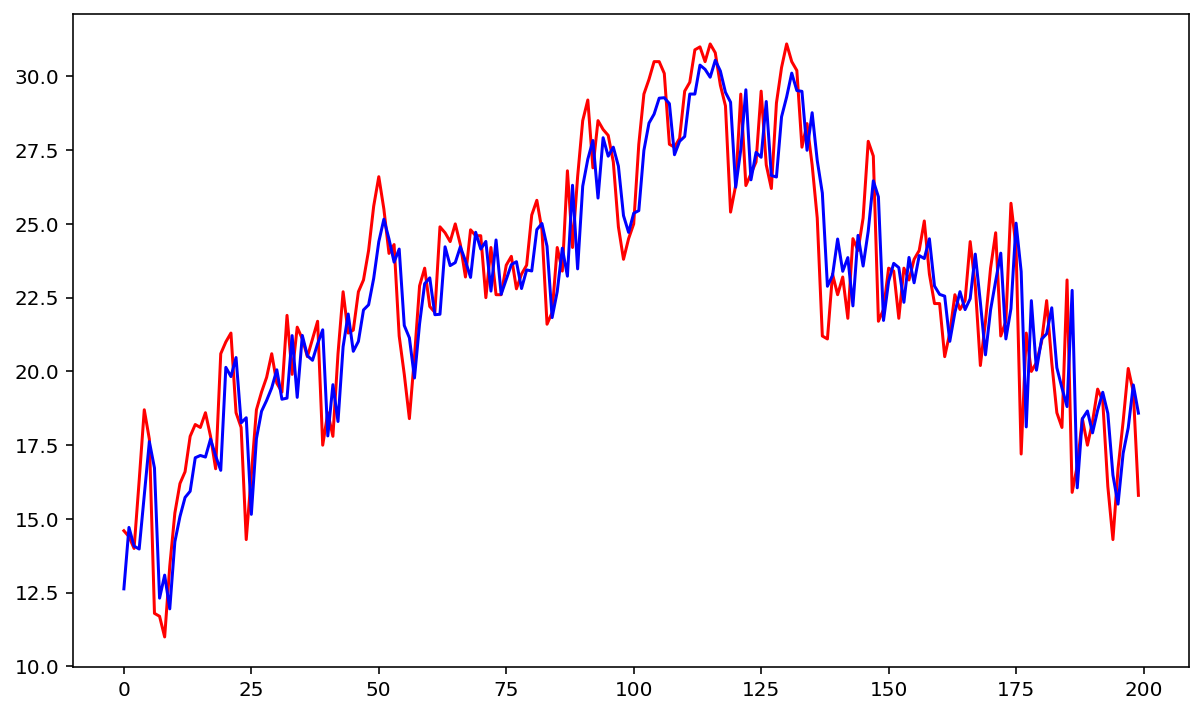

In [31]:
lr = LinearRegression()

# 최적값 사용 n_steps = 10, 윈도우 크기

n_steps = 10
x_train, y_train = split_seq(train, n_steps)
x_test, y_test = split_seq(test, n_steps)
lr.fit(x_train, y_train) 
y_pred = lr.predict(x_test)
print(n_steps, lr.score(x_test, y_test)) # R2

# 결과 그래프
plt.figure(figsize=(10, 6))
plt.plot(y_test[:200], c='r')
plt.plot(y_pred[:200], c='b')
plt.show()

In [32]:
error = np.abs(y_pred - y_test)
print("MAE=", error.mean())
print("max=", max(error))
print("R2=",lr.score(x_test, y_test)) # R2

MAE= 1.497897124679352
max= 8.613561682545189
R2= 0.9359804760059094


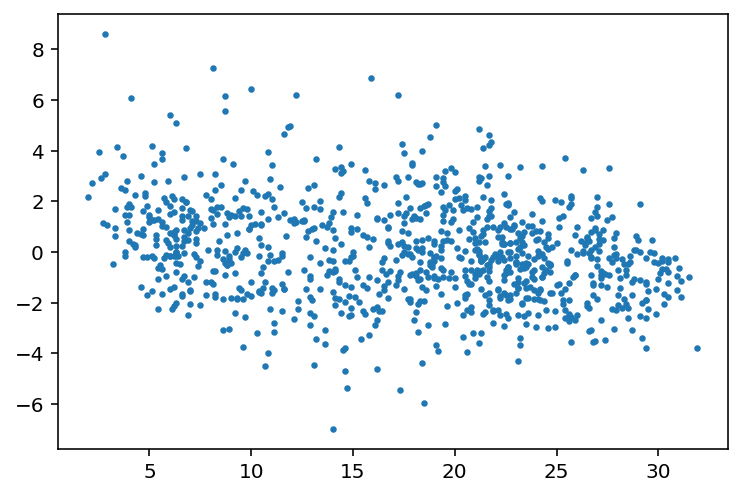

In [36]:
plt.scatter(y_test, error, s=5)

# 나이브 모델

In [51]:
def naive_model(x_seq):
    return np.array(x_seq).mean(axis=1)
#     return x_seq[-1] # persistent 모델

In [48]:
data

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [49]:
naive_model(data)

10

In [53]:
x_test, y_test = split_seq(test, 1) # persistent 모델
# m.fit(x_train, y_train)
y_pred = naive_model(x_test)
print(r2_score(y_test, y_pred))

0.9266048196593487


In [54]:
error = np.abs(y_pred  - y_test)
print("MAE=", error.mean())
print("max=", max(error))
# print("R2=",lr.score(x_test, y_test)) # R2

MAE= 1.5845617529880478
max= 10.4


## naive  모델에서 최적의 윈도우 크기
- 과거의 평균치로 예측하는 경우를 가정
- Baseline 모델, 새로운 모델은 이것보다는 좋아야 하는 기준

In [55]:
for i in range(1,20): 
    n_steps=i
#   x_train, y_train = split_seq(train, n_steps)
    x_test, y_test = split_seq(test, n_steps)
    y_pred = naive_model(x_test)
    r2_score(y_test, y_pred)
    print(n_steps, r2_score(y_test, y_pred).round(4))

1 0.9266
2 0.9166
3 0.9113
4 0.9074
5 0.9037
6 0.901
7 0.8991
8 0.8982
9 0.8971
10 0.896
11 0.8948
12 0.8932
13 0.8913
14 0.8897
15 0.888
16 0.8861
17 0.8841
18 0.8812
19 0.8778


# Prophet 사용

In [64]:
!pip install fbprophet

In [56]:
from fbprophet import Prophet

In [27]:
df

,연월일,기온,품질,균질
0,2006/1/1,3.6,8,1
1,2006/1/2,4.0,8,1
2,2006/1/3,3.7,8,1
3,2006/1/4,4.0,8,1
4,2006/1/5,3.6,8,1
...,...,...,...,...
4013,2016/12/27,11.1,8,2
4014,2016/12/28,6.0,8,2
4015,2016/12/29,4.3,8,2
4016,2016/12/30,6.0,8,2


In [57]:
df = df.drop(["품질", "균질"], axis=1)

In [58]:
df.columns = ['ds', 'y']
df

,ds,y
0,2006/1/1,3.6
1,2006/1/2,4.0
2,2006/1/3,3.7
3,2006/1/4,4.0
4,2006/1/5,3.6
...,...,...
4013,2016/12/27,11.1
4014,2016/12/28,6.0
4015,2016/12/29,4.3
4016,2016/12/30,6.0


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4018 entries, 0 to 4017
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      4018 non-null   object 
 1   y       4018 non-null   float64
dtypes: float64(1), object(1)
memory usage: 62.9+ KB


In [60]:
df.ds = df.ds.apply(pd.to_datetime)

In [61]:
df.ds

0      2006-01-01
1      2006-01-02
2      2006-01-03
3      2006-01-04
4      2006-01-05
          ...    
4013   2016-12-27
4014   2016-12-28
4015   2016-12-29
4016   2016-12-30
4017   2016-12-31
Name: ds, Length: 4018, dtype: datetime64[ns]

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4018 entries, 0 to 4017
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      4018 non-null   datetime64[ns]
 1   y       4018 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 62.9 KB


In [76]:
train = df[:3500]
test = df[3500:]
train.shape, test.shape

((3500, 2), (518, 2))

In [77]:
model = Prophet()
model.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [78]:
future_test = test.drop('y',axis=1);future_test

,ds
3500,2015-08-02
3501,2015-08-03
3502,2015-08-04
3503,2015-08-05
3504,2015-08-06
...,...
4013,2016-12-27
4014,2016-12-28
4015,2016-12-29
4016,2016-12-30


In [79]:
forecast = model.predict(future_test)

In [87]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-08-02,16.561539,24.923364,31.173013,16.561539,16.561539,11.497560,11.497560,11.497560,-0.108869,-0.108869,-0.108869,11.606428,11.606428,11.606428,0.0,0.0,0.0,28.059099
1,2015-08-03,16.560982,25.096882,31.299970,16.560982,16.560982,11.620111,11.620111,11.620111,-0.059070,-0.059070,-0.059070,11.679181,11.679181,11.679181,0.0,0.0,0.0,28.181093
2,2015-08-04,16.560424,25.252215,31.485890,16.560424,16.560424,11.800380,11.800380,11.800380,0.057071,0.057071,0.057071,11.743308,11.743308,11.743308,0.0,0.0,0.0,28.360803
3,2015-08-05,16.559866,25.433271,31.321907,16.559866,16.559866,11.826961,11.826961,11.826961,0.028758,0.028758,0.028758,11.798203,11.798203,11.798203,0.0,0.0,0.0,28.386827
4,2015-08-06,16.559309,25.355711,31.506450,16.559309,16.559309,11.862754,11.862754,11.862754,0.019394,0.019394,0.019394,11.843360,11.843360,11.843360,0.0,0.0,0.0,28.422063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,2016-12-27,16.275466,3.533385,9.658198,16.092155,16.415440,-9.730293,-9.730293,-9.730293,0.057071,0.057071,0.057071,-9.787365,-9.787365,-9.787365,0.0,0.0,0.0,6.545173
514,2016-12-28,16.274909,3.605364,9.565677,16.091101,16.415716,-9.873599,-9.873599,-9.873599,0.028758,0.028758,0.028758,-9.902357,-9.902357,-9.902357,0.0,0.0,0.0,6.401309
515,2016-12-29,16.274351,2.995825,9.224363,16.089991,16.415760,-9.992802,-9.992802,-9.992802,0.019394,0.019394,0.019394,-10.012196,-10.012196,-10.012196,0.0,0.0,0.0,6.281549
516,2016-12-30,16.273793,3.228792,9.258210,16.088881,16.415803,-10.031572,-10.031572,-10.031572,0.084984,0.084984,0.084984,-10.116555,-10.116555,-10.116555,0.0,0.0,0.0,6.242222


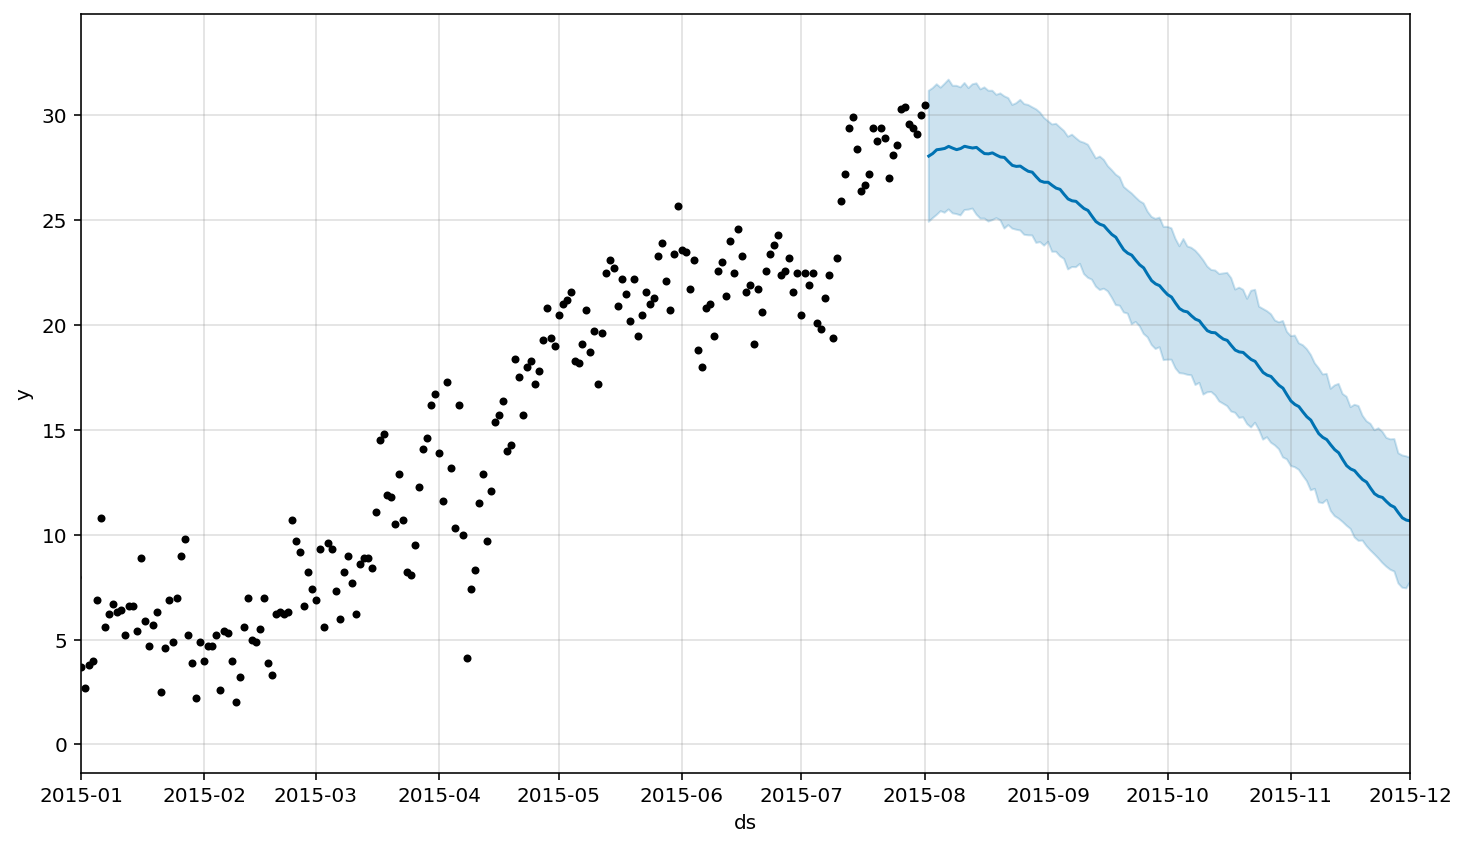

In [86]:
model.plot(forecast)
from datetime import datetime
plt.xlim([datetime(2015, 1, 1), datetime(2015, 12, 1)])
plt.show()

In [82]:
y_pred = forecast['yhat'].values
y_pred.shape

(518,)

In [83]:
y_test = test.y.values
y_test.shape

(518,)

In [84]:
r2_score(y_test, y_pred)

0.8877830476016834

# 라이브러리

In [ ]:
cut = np.int((len(ys)*0.7))
train = ys[:cut]
test = ys[cut:]
ys.shape, train.shape, test.shape, cut

In [ ]:
def split_seq_2(sequence, n_steps_in, n_steps_out=1):
  x, y = [],[]
  for i in range(len(sequence)):
    end_ix = i + n_steps_in
    out_end_ix = end_ix + n_steps_out
    if out_end_ix > len(sequence):
        break
    seq_x, seq_y = sequence[i:end_ix], sequence[out_end_ix-1]
    x.append(seq_x)
    y.append(seq_y)
  return np.array(x), np.array(y)

In [ ]:
# 실제값과 예측치 비교
def plot_y_pred(y_test, y_pred):
    plt.figure(figsize=(8, 5))
    plt.plot(y_test, c='r')
    plt.plot(y_pred, c='b')
    plt.show()
    print("R2=", r2_score(y_test, y_pred).round(3))
    error = abs(y_test - y_pred)
    print("MAE=", error.mean().round(3))
    print("rmse=", np.sqrt((error**2).mean()).round(3))
    print("max=", max(error).round(3))

In [ ]:
def scatter_errors(y_test, y_pred):
    error = abs(y_test - y_pred)
    plt.scatter(y_test, error, s=2)

In [ ]:
lr = LinearRegression()
n_steps_in = 3
n_futures = range(10)
for n_steps_out in n_futures:
  x_train, y_train = split_seq_2(train, n_steps_in, n_steps_out)
  x_test, y_test = split_seq_2(test, n_steps_in, n_steps_out)
  lr.fit(x_train, y_train) 
  print(n_steps_out, ',', lr.score(x_test, y_test).round(3))